In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from statsmodels.formula.api import ols
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, binarize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# SMOTE
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

#KNN Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#decision trees Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.externals.six import StringIO

#Random Forest Imports
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [91]:
hr_data = pd.read_csv('datafiles/hrdata_cleaned',index_col=0)

# 1. Is there any relationship between who a person works for and their performance score?
- Correlation between manager and performance score 

In [92]:
hr_data = hr_data.set_index('name')
data = pd.read_csv('datafiles/HR_dataset.csv')
data = data.set_index('Employee Name')
data = pd.get_dummies(data, columns = ['Performance Score'])

# Heatmap

In [93]:
full_df = pd.read_csv('datafiles/HR_dataset.csv', index_col=0)
perf_score = pd.DataFrame(full_df['Performance Score'])
manager_list = pd.DataFrame(full_df['Manager Name'])
manager_performances = pd.concat([perf_score,manager_list], axis=1)

In [94]:
manager_performances.columns=['performance','manager']
df1 = pd.get_dummies(manager_performances, columns = ['manager'], drop_first=True )
#Alex Sweetwater was dropped 

df1_corr = df1.corr()
df1_corr = df1_corr.fillna(0)
df1['performance'].unique()

array(['Fully Meets', 'N/A- too early to review', '90-day meets',
       'Exceptional', 'Needs Improvement', 'Exceeds', 'PIP', nan],
      dtype=object)

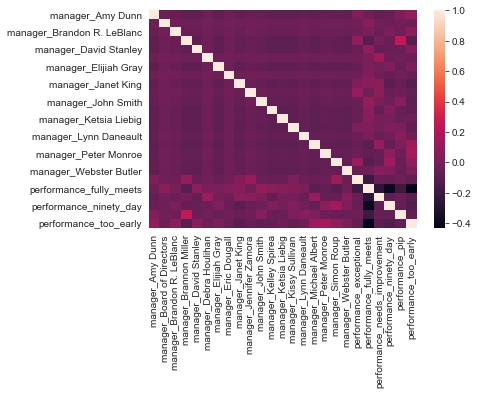

In [95]:
df1['performance'] = df1['performance'].replace(['Fully Meets','N/A- too early to review','90-day meets','Exceptional', 'Needs Improvement','Exceeds', 'PIP'],['fully_meets','too_early','ninety_day', 'exceptional','needs_improvement','exceeds','pip'])
# df1['performance'] = df1['performance'].replace('Fully Meets','fully_meets')
df1 = pd.get_dummies(df1, columns = ['performance'], drop_first=True )
#exceeds was dropped 
df_corr = df1.corr()
sns.heatmap(df_corr)

**Variance** - measure of dispersion of continuous random variables from its expected mean value

**Covariance** - when trying to figure out how two random variables vary together
- A **positive** covariance indicates that two variables are positively related
- A **negative** covariance indicates that two variables are inversely related
- A covariance **equal or close to 0** indicates that there is no linear relationship between two variables

**Correlation** is calculated by standardizing covariance by some measure of variability in the data, it produces a quantity that has intuitive interpretations and consistent scale.
- **Pearson Correlation Coefficient**,  𝑟 , also called the linear correlation coefficient, measures the strength and the direction of a linear relationship between two variables. This coefficient quantifies the degree to which a relationship between two variables can be described by a line.


**1. Mean normalized**

In [96]:
# Write a function to take in an iterable, calculate the mean and subtract the mean value
# from each element, creating and returning a new list. 
def mean_normalize(var):
    norm = [] # Vector for storing output values 
    mean = sum(var)/len(var)   
    for i in var: # for each element in the vector, subtract from mean and add the result to norm
        diff = i - mean
        norm.append(diff)
    return norm

Text(0.5, 1.0, 'Age Normalized')

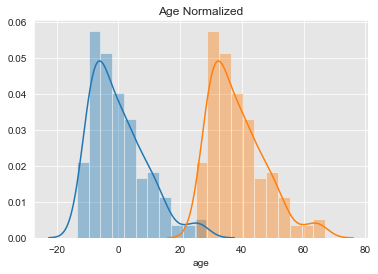

In [97]:
age_normalized = mean_normalize(hr_data['age'])
# Visualize the age data distribution before and after mean normalization 
sns.distplot(age_normalized)
sns.distplot(hr_data['age'])
plt.title('Age Normalized')

- Notice the shape of the data isn't changed, but the mean is just shifted (normalization process)

Text(0.5, 1.0, 'Pay Rate Normalized')

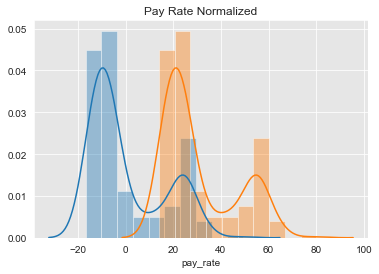

In [98]:
pay_normalized = mean_normalize(hr_data['pay_rate'])
# Visualize the PAY data distribution before and after mean normalization 
sns.distplot(pay_normalized)
sns.distplot(hr_data['pay_rate'])
plt.title('Pay Rate Normalized')

In [99]:
# FUNCTION: dot product of two iterables 
def dot_product(x, y):
    prod_vec = 0 # Initliaze an empty list to store the results 
    # For all elements in the vectors, multiply and save results in prod_vec
    for i in range(len(x)):
        prod = x[i]* y[i]
        prod_vec += prod
    return prod_vec

In [100]:
def covariance(var1, var2):
    # Formula for covariance is:
    # [Sum (x_i - X)(y_i - Y)] / N-1 
    # Sanity Check: Check to see if both vectors are of same length
    # Exit the function if variables have different lengths
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
        # Mean normalize both variables 
        x = mean_normalize(var1)
        y = mean_normalize(var2)
        # Take the dot product of mean normalized variables
        result = dot_product(x, y)
        # divide the dot product by n-1    
        return result /((len(var1)) - 1)

In [101]:
covariance(age_normalized,pay_normalized)

2.448728205128202

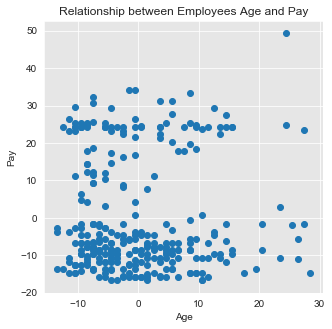

In [102]:
#Relationship between Age and Pay 
fig = plt.figure(figsize=(5,5))
plt.scatter(age_normalized,pay_normalized)
plt.xlabel('Age')
plt.ylabel('Pay')
plt.title('Relationship between Employees Age and Pay')
fig.savefig("images/agepay_corr.png")

- you can see that there is no relationship between age and pay 

In [103]:
# Calculate Correlation between two variables using formula above
import math
def correlation(var1, var2):  
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)

correlation(age_normalized,pay_normalized)

0.02

In [104]:
# Check - LOW CORRELATION BETWEEN AGE AND PAY

pay = hr_data['pay_rate']
age = hr_data['age']
pay_age = pd.concat([pay,age], axis = 1)

# Multicolinearity

In [105]:
df1 = pd.read_csv('datafiles/HR_dataset.csv')
data=data.drop(columns=['Date of Termination'])
data = data.fillna(0)
data.drop(data.tail(1).index,inplace=True)

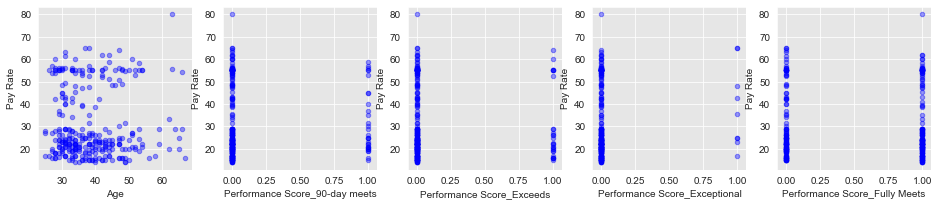

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
 
for xcol, ax in zip(['Age','Performance Score_90-day meets', 'Performance Score_Exceeds','Performance Score_Exceptional', 'Performance Score_Fully Meets','Performance Score_N/A- too early to review','Performance Score_Needs Improvement', 'Performance Score_PIP'], axes):
    data.plot(kind='scatter', x=xcol, y='Pay Rate', ax=ax, alpha=0.4, color='b')

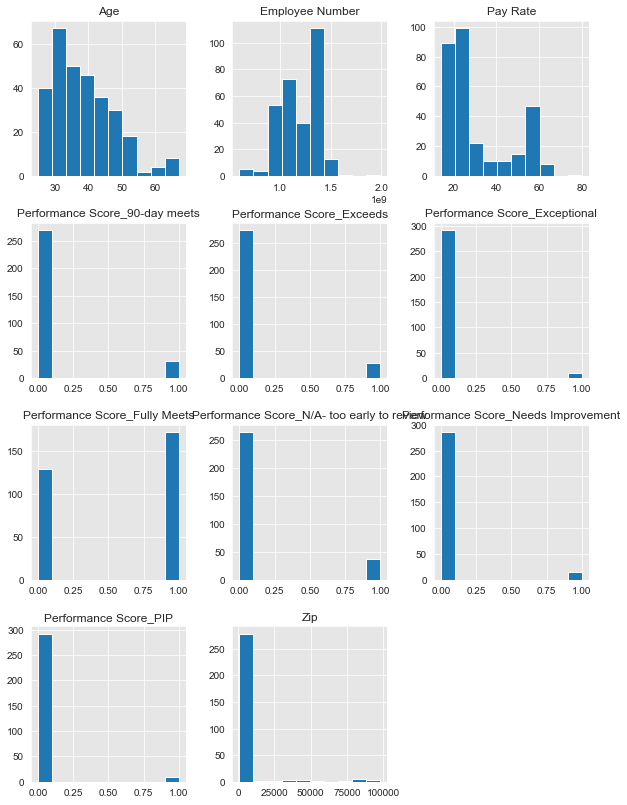

In [107]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,14))
ax = fig.gca()
data.hist(ax = ax);

In [108]:
managers = list(data['Manager Name'].value_counts().keys())

In [109]:
perf_score = list(df1['Performance Score'].value_counts().keys())
origin = list(data['Manager Name'].value_counts().keys())
origin_series = pd.Series(origin)
cat_origin = origin_series.astype('category')
cat_origin.cat.codes

0     12
1     14
2      7
3     16
4      5
5      4
6     19
7     13
8      1
9      9
10    18
11    11
12    17
13    15
14     0
15     3
16    10
17     8
18     6
19     2
dtype: int8

In [110]:
data = pd.get_dummies(data, columns = ['Manager Name'])
data.columns=['emp_num', 'state','zip','dob','age','sex','martial_status', 'citizen','hispanic','race','doh','reason_term','emp_status','department','pos','pay_rate','emp_source','perf_ninetymeets','perf_exceeds','perf_exceptional','perf_fullymeets','perf_tooearly','perf_needsimprovement','perf_pip','manager_alex','manager_amy','manager_board','manager_brandon','manager_brannon','manager_david','manager_debra','manager_elijiah','manager_eric','manager_janet','manager_jen','manager_john','manager_kelly','manager_ketisa','manager_kissy','manager_lynn','manager_michael','manager_peter','manager_simon','manager_webster']
data = data.drop(columns = ['emp_num','dob','reason_term'])

# Frequency Distribution

**we want to determine the correlation between 2 categorical variables** 
- Manager name 
- performance scores 



In [111]:
confusion_matrix = pd.crosstab(df1['Manager Name'], df1['Performance Score'])

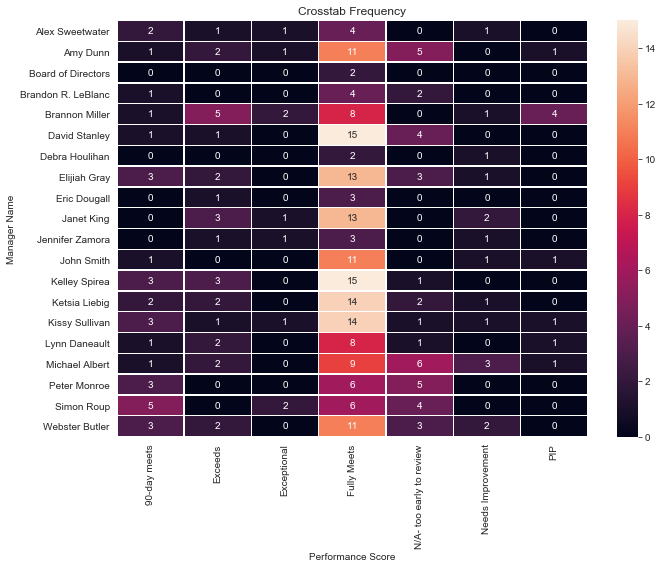

In [112]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(confusion_matrix,annot=True, linewidths=.5)
plt.title('Crosstab Frequency')
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("images/frequency.png")

In [113]:
import scipy.stats as ss

In [114]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

In [115]:
def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

result = cramers_stat(confusion_matrix)

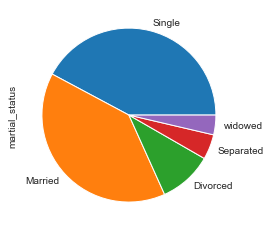

In [116]:
ax = data['martial_status'].value_counts().plot(kind='pie')
fig = ax.get_figure()
fig.savefig("images/maritalDesc.png")

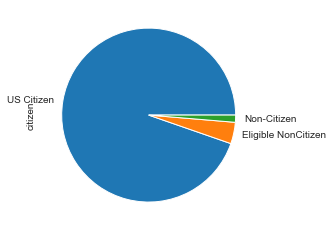

In [117]:
ax = data['citizen'].value_counts().plot(kind='pie')
fig = ax.get_figure()
fig.savefig("images/citizen.png")

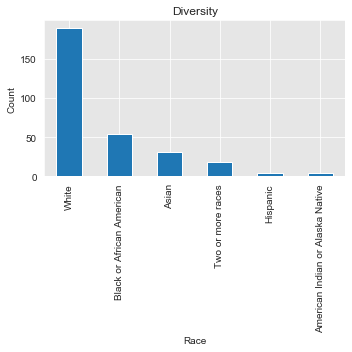

In [118]:
plt.figure(figsize=(5,5))
ax = data['race'].value_counts().plot(kind='bar')
fig = ax.get_figure()
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Diversity')
plt.tight_layout()
fig.savefig("images/race.png")

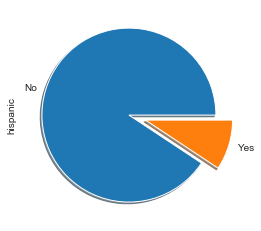

In [119]:
data['hispanic'].replace('yes','Yes',inplace=True)
data['hispanic'].replace('no','No',inplace=True)
explode=(0,0.2)
sizes = [91,9]
ax = data['hispanic'].value_counts().plot(kind='pie',explode=explode, shadow=True)
explode = (0, 0.1) 
fig = ax.get_figure()
fig.savefig("images/hispanic.png")

# 2. Overall Diverstiy within the Organization 

In [120]:
diversity_df = pd.read_csv('datafiles/diversity.csv',index_col=0)

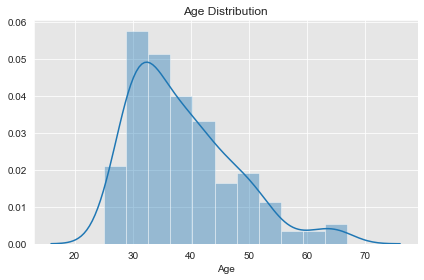

In [121]:
#simple age distribution
ax = sns.distplot(diversity_df['Age'])
plt.title('Age Distribution')
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("images/age_dist.png")

In [122]:
diversity_df['Sex'].replace('male','Male',inplace=True)
diversity_df['Sex'].replace('Male',1,inplace=True)
diversity_df['Sex'].replace('Female',0,inplace=True)
diversity_df['male']=diversity_df['Sex']
diversity_df = diversity_df.drop(columns=['Sex'])
diversity_df = diversity_df.dropna()
diversity_df['MaritalDesc'].replace(['Single','widowed','Divorced'],0,inplace=True)
diversity_df['MaritalDesc'].replace(['Married','Separated'],1,inplace=True)
diversity_df['married']=diversity_df['MaritalDesc']
diversity_df = diversity_df.drop(columns=['MaritalDesc'])
diversity_df=diversity_df.drop(columns=['CitizenDesc'])
diversity_df['Hispanic/Latino'].replace(['No','no'],0,inplace=True)
diversity_df['Hispanic/Latino'].replace(['Yes','yes'],1,inplace=True)
diversity_df['RaceDesc'].replace('White',1,inplace=True)
diversity_df['RaceDesc'].replace(['Black or African American', 'Asian', 'Two or more races','Hispanic','American Indian or Alaska Native'],0,inplace=True)
diversity_df['white'] = diversity_df['RaceDesc']
diversity_df=diversity_df.drop(columns=['RaceDesc'])
diversity_df = pd.get_dummies(diversity_df, columns = ['Employment Status', 'Department'])

In [123]:
diversity_df.columns

Index(['Age', 'Hispanic/Latino', 'Pay Rate', 'emp_source', 'male', 'married',
       'white', 'Employment Status_Active', 'Employment Status_Future Start',
       'Employment Status_Leave of Absence',
       'Employment Status_Terminated for Cause',
       'Employment Status_Voluntarily Terminated', 'Department_Admin Offices',
       'Department_Executive Office', 'Department_IT/IS',
       'Department_Production       ', 'Department_Sales',
       'Department_Software Engineering',
       'Department_Software Engineering     '],
      dtype='object')

In [124]:
diversity_df['emp_source'].unique()
diversity_df['emp_source'].replace(['Diversity Job Fair', 'Website Banner Ads', 'Internet Search','Pay Per Click - Google', 'Monster.com', 'Other','Employee Referral', 'Search Engine - Google Bing Yahoo','Glassdoor', 'Vendor Referral', 'Professional Society','Information Session', 'Company Intranet - Partner','On-campus Recruiting', 'Billboard', 'MBTA ads', 'Word of Mouth','Social Networks - Facebook Twitter etc','On-line Web application', 'Newspager/Magazine', 'Pay Per Click','Careerbuilder'],['job_fair','web_banner','int_search','PPC_google','monster','other','referral','int_search','glassdoor','vendor_referral','prof_society','info_session','company_partner','campus_recruiting','ads','ads','word_of_mouth','social_network','web_application','newspaper_magazine','PPC_google','careerbuilder'],inplace=True)
# diversity_df=pd.get_dummies(diversity_df, columns = ['emp_source'])
diversity_df.columns=['age', 'latino','pay_rate','emp_source','male','married','white','status_active','status_futurestart','status_leaveofabsence','status_term_for_cause','status_term_volun','dep_admin','dep_exec','dep_it','dep_production','dep_sales','dep_softengineering','dep_soft']
diversity_df['dep_software_engineering'] = diversity_df['dep_softengineering']+diversity_df['dep_soft']

In [125]:
diversity_df = diversity_df.drop(columns=['dep_softengineering','dep_soft'])

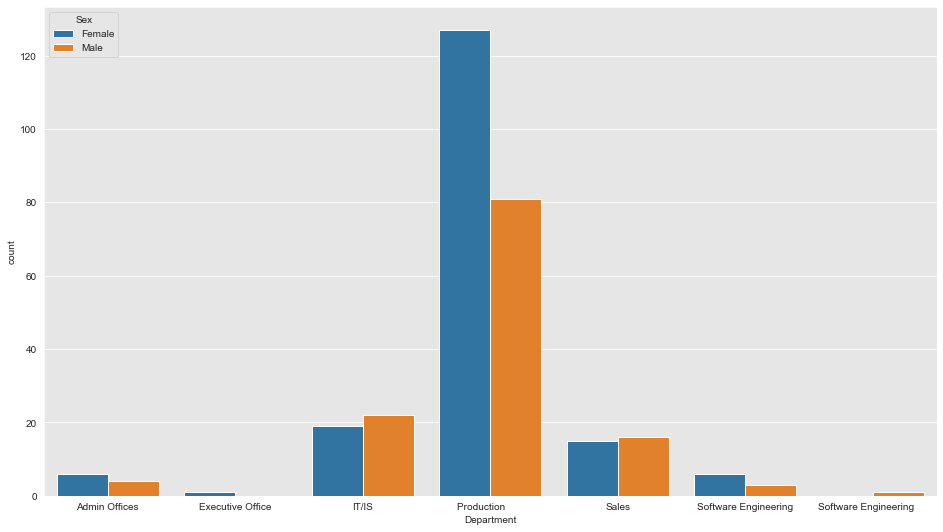

In [126]:
df1['Sex'].replace('male','Male',inplace=True)
plt.figure(figsize=(16,9))
ax=sns.countplot(x=df1['Department'],hue=df1['Sex'])

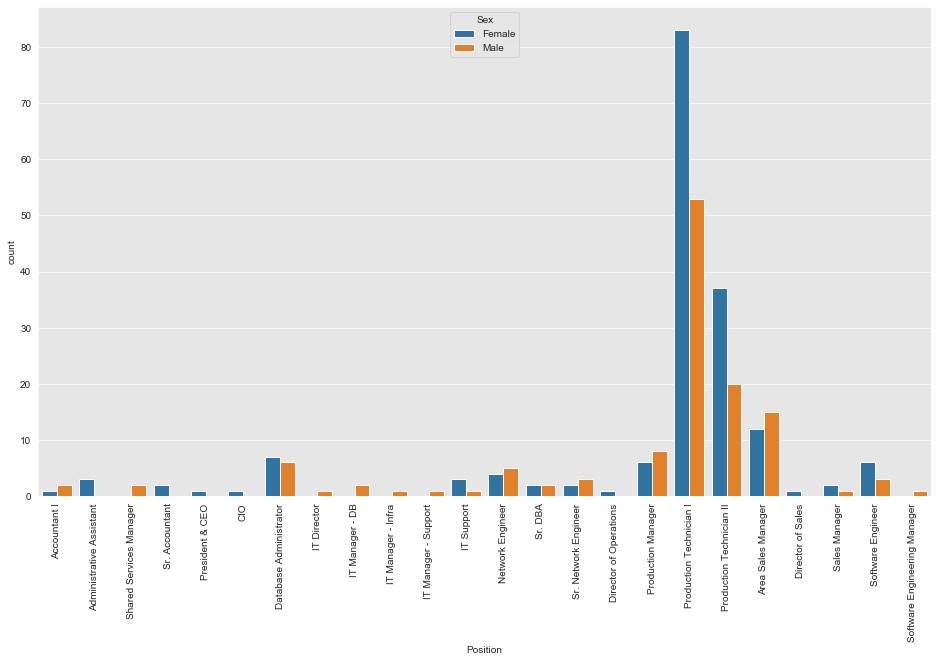

In [127]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
ax=sns.countplot(x=df1['Position'],hue=df1['Sex'])

In [128]:
# df1['pay_rate'].describe()
df1['pay_bins'] = pd.qcut(df1['Pay Rate'], q=3)

In [129]:
df1['Sex'].value_counts()

Female    174
Male      127
Name: Sex, dtype: int64

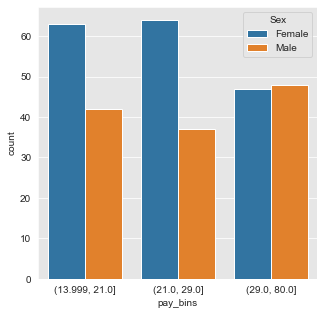

In [130]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df1['pay_bins'],hue=df1['Sex']) 

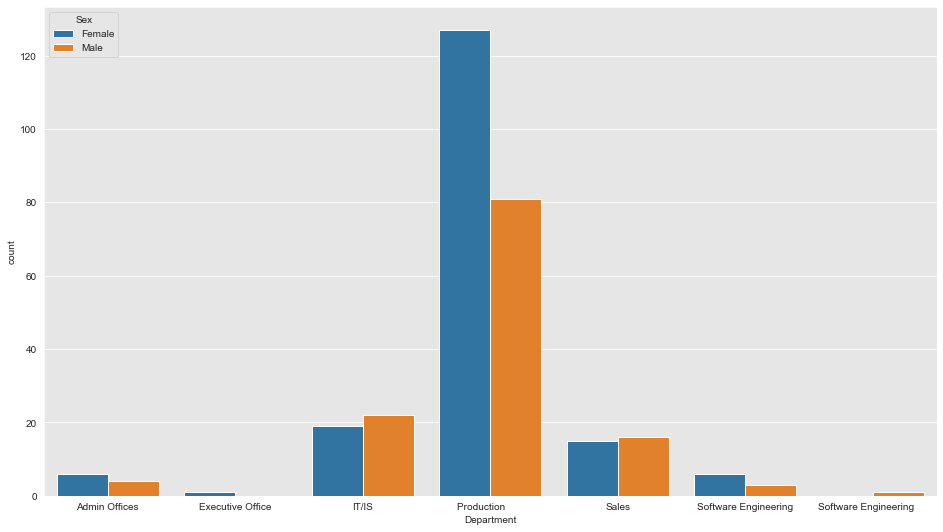

In [131]:
df1['Sex'].replace('male','Male',inplace=True)
plt.figure(figsize=(16,9))
ax=sns.countplot(x=df1['Department'],hue=df1['Sex'])

Text(0.5, 1, 'Diversity within the Organization')

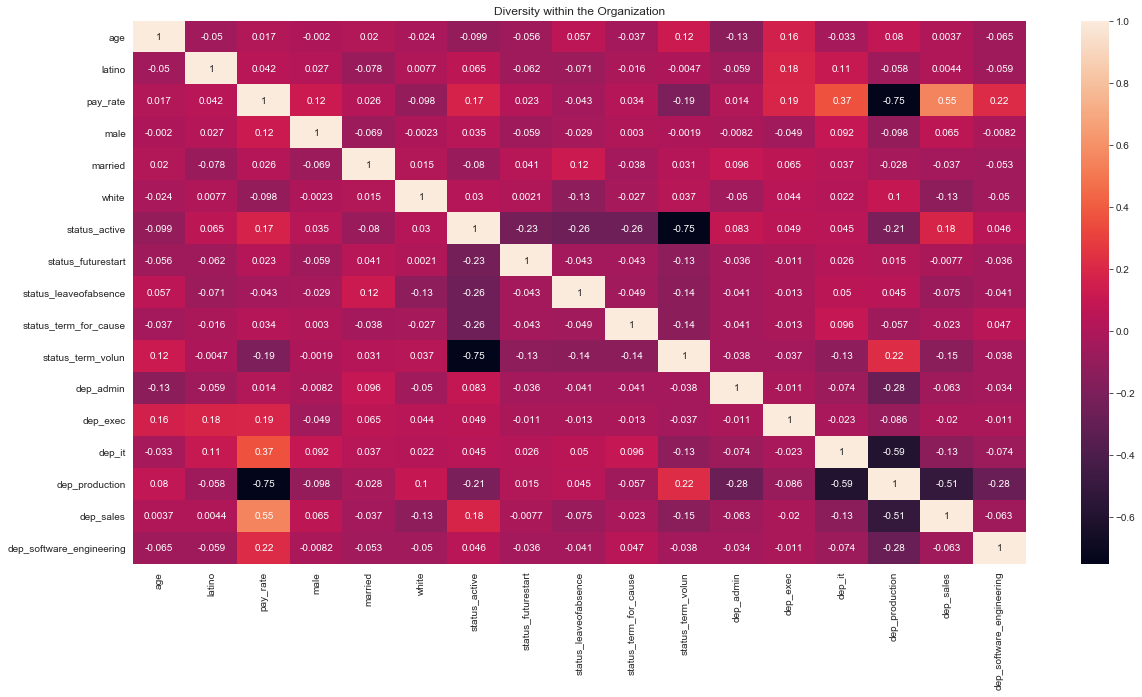

In [132]:
plt.figure(figsize=(20,10))
sns.heatmap(diversity_df.corr(),annot=True)
plt.title('Diversity within the Organization')

# Multicollinearity of Features

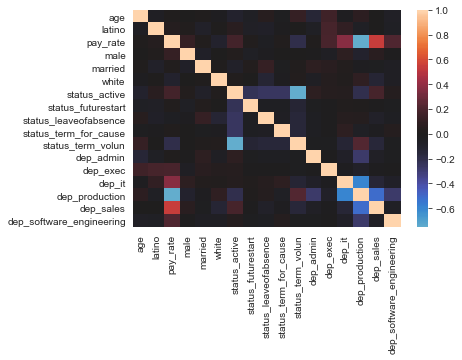

In [133]:
sns.heatmap(diversity_df.corr(), center=0)
#not much correlation... maybe between department and payrate

# Linear Regression
- Pay Rate 

In [134]:
import statsmodels.api as sm

In [135]:
x_cols =['dep_admin','dep_exec','dep_it','dep_production','dep_sales','dep_software_engineering']

In [136]:
outcome = 'pay_rate'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=diversity_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pay_rate   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     108.4
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           1.15e-64
Time:                        17:21:44   Log-Likelihood:                -1089.1
No. Observations:                 301   AIC:                             2190.
Df Residuals:                     295   BIC:                             2212.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   40.5662      1.462     27.752      0.000      37.689      43.443
dep_admin                   -8.6702      2.840     -3.053      0.002     -14.259      -3.081
dep_exec                    39.4338      7.837      5.032      0.000      24.010      54.858
dep_it                       4.2260      1.893      2.233      0.026       0.501       7.951
dep_production             -17.4799      1.556    -11.232      0.000     -20.543     -14.417
dep_sales                   14.9580      2.012      7.433      0.000      10.998      18.918
dep_software_engineering     8.0988      2.840      2.852      0.005       2.510      13.688
==============================================================================
Omnibus:                      105.961   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.676
Skew:                           1.582   Prob(JB):                     8.55e-71
Kurtosis:                       6.965   Cond. No.                     4.64e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

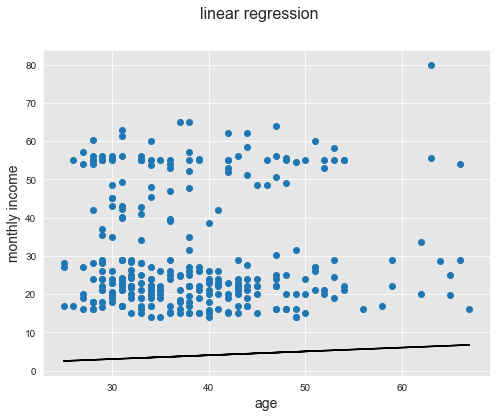

In [137]:
age = diversity_df['age']
income = diversity_df['pay_rate']

fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.plot(age, age/10, c='black')
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

# Active Vs Non-Active Employees

In [138]:
active_employees=pd.read_csv('datafiles/active_employees.csv')
term_employees=pd.read_csv('datafiles/fired_employees.csv')
terminated_count = term_employees['Manager Name'].value_counts()

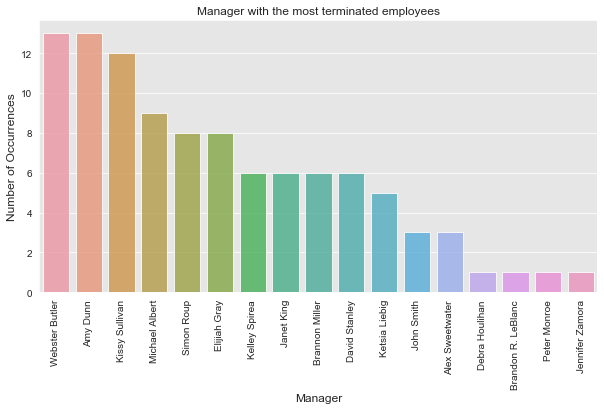

In [139]:
terminated_count = term_employees['Manager Name'].value_counts()
# city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(terminated_count.index, terminated_count.values, alpha=0.8)
plt.title('Manager with the most terminated employees')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Manager', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

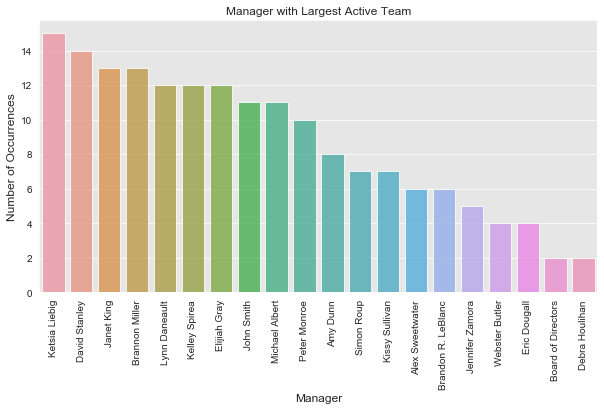

In [140]:
active_count = active_employees['Manager Name'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(active_count.index, active_count.values, alpha=0.8)
plt.title('Manager with Largest Active Team')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Manager', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [141]:
df2 = pd.concat([active_employees,term_employees], axis = 0 )

# 4. What are our best recruiting sources if we want to ensure a diverse organization?

In [142]:
data = pd.read_csv('datafiles/recruiting_sources.csv', index_col=0)

In [143]:
data['employee_source'].replace('Pay Per Click','Pay Per Click - Google', inplace = True)
data['employee_source'].replace('Pay Per Click - Google','Search Engine - Google Bing Yahoo', inplace = True)

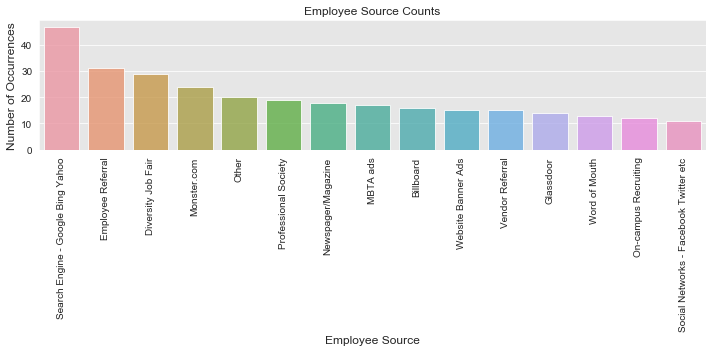

In [144]:
sources = data['employee_source'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(sources.index, sources.values, alpha=0.8)
plt.title('Employee Source Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Employee Source', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("images/source_count.png")

# 5. Can we predict if an employee will be terminated?

In [145]:
df1 = data.iloc[:,0:1]
df2 = data.iloc[:,5:6]
df3 = data.iloc[:,11:23]
df = pd.concat([df1,df2,df3],axis=1)

In [146]:
df['emp_status'].replace(['Active','Leave of Absence','Future Start'],1, inplace=True)
df['emp_status'].replace(['Voluntarily Terminated','Terminated for Cause'],0, inplace=True)
df.columns=['name', 'age', 'date_of_hire', 'date_of_term', 'reason_for_term','employed', 'department', 'position', 'pay_rate', 'manager_name','employee_source', 'performance_score']
df['date_of_hire']=pd.to_datetime(df['date_of_hire'])
df['performance_score'].replace(['Exceptional','Exceeds','90-day meets','Fully Meets','Needs Improvement','PIP','N/A- too early to review'],[7,6,5,4,3,2,1], inplace=True)
df = pd.get_dummies(df, columns = ['manager_name'],prefix='man_',drop_first=True)

**Set target variable and features**

In [147]:
df_target = df['employed']
df_feats = df.drop(columns=['date_of_term','reason_for_term','department','position','employee_source'])

In [148]:
df_target.value_counts()

1    199
0    102
Name: employed, dtype: int64

In [149]:
#creating matrix of features 
X = df_feats.drop(columns=['employed','name'])
#assigning target variable 
y = df_target
#creating a list of features
feature_cols = X.columns

In [150]:
y.value_counts()

1    199
0    102
Name: employed, dtype: int64

**Logistic regression**

In [151]:
logreg = LogisticRegression()
X = X.fillna(value=0) 
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

,age,date_of_hire,pay_rate,performance_score,man__Amy Dunn,man__Board of Directors,man__Brandon R. LeBlanc,man__Brannon Miller,man__David Stanley,man__Debra Houlihan,...,man__Jennifer Zamora,man__John Smith,man__Kelley Spirea,man__Ketsia Liebig,man__Kissy Sullivan,man__Lynn Daneault,man__Michael Albert,man__Peter Monroe,man__Simon Roup,man__Webster Butler
0,0.166667,0.265731,0.219697,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.190476,0.758970,0.136364,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.142857,0.828133,0.227273,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.166667,0.864535,0.113636,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.095238,0.883775,0.038788,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Train, Test, Split Method**

In [152]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [153]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [154]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros 
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
# 183 correct, ~ 81% accuracy

0    183
1     42
Name: employed, dtype: int64
0    0.813333
1    0.186667
Name: employed, dtype: float64


In [155]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
# 53 correct, ~ 70% accuracy

0    53
1    23
Name: employed, dtype: int64
0    0.697368
1    0.302632
Name: employed, dtype: float64


In [156]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.6973684210526315


In [157]:
from sklearn.metrics import confusion_matrix
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[18 16]
 [ 7 35]]


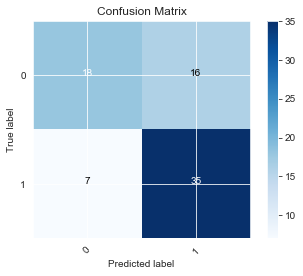

In [158]:
# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [159]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show()

Normalized confusion matrix
[[0.52941176 0.47058824]
 [0.16666667 0.83333333]]


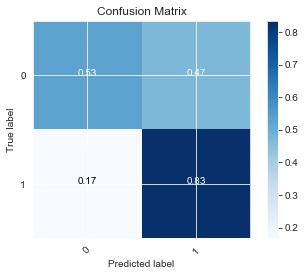

In [160]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [161]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.8402366863905325
Testing Precision:  0.6862745098039216



Training Recall:  0.9044585987261147
Testing Recall:  0.8333333333333334



Training Accuracy:  0.8133333333333334
Testing Accuracy:  0.6973684210526315



Training F1-Score:  0.8711656441717791
Testing F1-Score:  0.7526881720430109


**SMOTE**
- Synthetic Minority Oversampling Technique which uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [178]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 199, 0: 199})


In [179]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [180]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
print('Accuracy_Score--------')
print(metrics.accuracy_score(y_test, y_pred_class))
print('\n')
print('Value_Counts--------')
print(y_test.value_counts())

Accuracy_Score--------
0.77


Value_Counts--------
0    58
1    42
Name: employed, dtype: int64


In [182]:
cnf_matrix = confusion_matrix(y_test, y_pred_class)
cnf_matrix

array([[45, 13],
       [10, 32]])

Confusion matrix, without normalization
[[45 13]
 [10 32]]


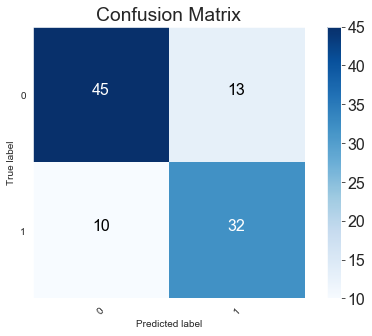

<Figure size 432x288 with 0 Axes>

In [183]:
fig, ax = plt.subplots(figsize=(8,5))
ax = plt.grid(False)
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Confusion matrix')
plt.tight_layout()
fig.savefig("images/conf_matrix.png")

Normalized confusion matrix
[[0.77586207 0.22413793]
 [0.23809524 0.76190476]]


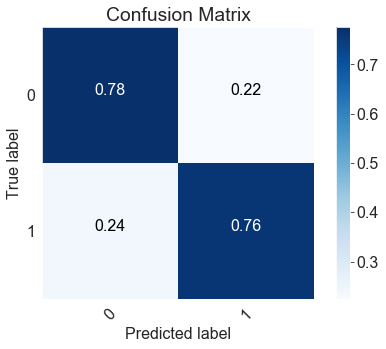

<Figure size 432x288 with 0 Axes>

In [184]:
fig, ax = plt.subplots(figsize=(8,5))
ax = plt.grid(False)
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.tight_layout()
fig.savefig("images/conf_matrix_normalized.png")

# Evaluation of Model

In [185]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.8
Testing Precision:  0.7111111111111111



Training Recall:  0.7898089171974523
Testing Recall:  0.7619047619047619



Training Accuracy:  0.785234899328859
Testing Accuracy:  0.77



Training F1-Score:  0.7948717948717949
Testing F1-Score:  0.735632183908046


In [186]:
TP = 31
TN = 45
FP = 13
FN = 11

# Sensitivity - "Recall"

Sensitivity tells us what percentage of employees were employed were actually correctly identified.

In [187]:
sensitivity = TP/(TP+FN)

In [188]:
sensitivity

0.7380952380952381

# Specificity

If correctly identifying positives is important for us, then we should choose a model with higher Sensitivity. However, if correctly identifying negatives is more important, then we should choose specificity as the measurement metric.

In [189]:
specificity = TN/(TN+FP)

In [190]:
specificity

0.7758620689655172

# ROC Curve

In [191]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

Training AUC: 0.8561232325970095


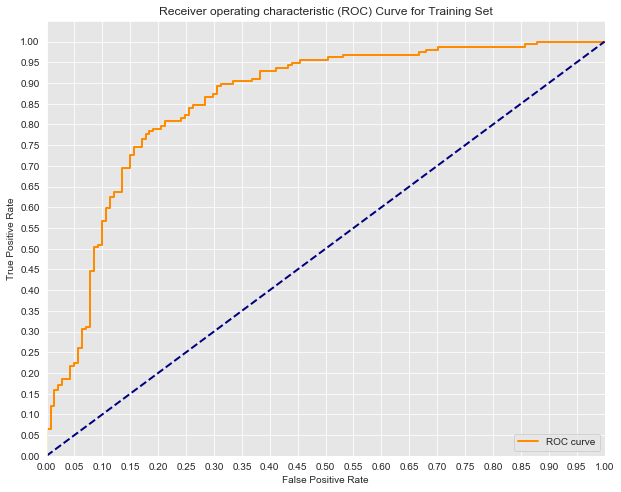

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

Test AUC: 0.7951559934318554



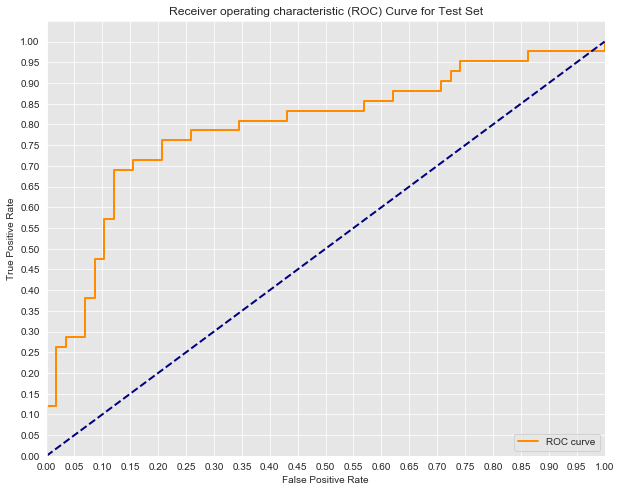

In [177]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()